# Select specific rows and columns

In [1]:
import pandas as pd 
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# select columns
df[['sex', 'class', 'deck']]

,sex,class,deck
0,male,Third,NaN
1,female,First,C
2,female,Third,NaN
3,female,First,C
4,male,Third,NaN
...,...,...,...
886,male,Second,NaN
887,female,First,B
888,female,Third,NaN
889,male,First,C


In [3]:
# select Rows

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# df.describe().loc[['min', '25%', '50%', '75%', 'max']]
# OR
df.describe().loc['min' : 'max']

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [5]:
# Select rows and columns at a time

df.describe().loc['min' : 'max', ['survived', 'age']]

,survived,age
min,0.0,0.420
25%,0.0,20.125
50%,0.0,28.000
75%,1.0,38.000
max,1.0,80.000


In [6]:
df.describe().loc['min' : 'max', 'survived' : 'age']

,survived,pclass,age
min,0.0,1.0,0.420
25%,0.0,2.0,20.125
50%,0.0,3.0,28.000
75%,1.0,3.0,38.000
max,1.0,3.0,80.000


# Reshape multiIndex series

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.survived.mean()

0.3838383838383838

In [9]:
df.groupby('sex').survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [10]:
df.groupby(['sex', 'class']).survived.mean()

C:\Users\Huzaifa Asad\AppData\Local\Temp\ipykernel_8724\3943914946.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'class']).survived.mean()


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [11]:
df.groupby(['sex', 'class']).survived.mean().unstack()

C:\Users\Huzaifa Asad\AppData\Local\Temp\ipykernel_8724\1574924337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'class']).survived.mean().unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Continuous to categorial data conversion

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [14]:
# creating bins
pd.cut(df.age, bins = [0, 18, 25, 99], labels=['childs', 'adults', 'youngs']).head()

0    adults
1    youngs
2    youngs
3    youngs
4    youngs
Name: age, dtype: category
Categories (3, object): ['childs' < 'adults' < 'youngs']

In [15]:
# add new column to end

df['new_age'] = pd.cut(df.age, bins = [0, 18, 25, 99], labels=['childs', 'adults', 'youngs']).head()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youngs
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,youngs
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,youngs


# Convert one set of values into another one 

In [16]:
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [17]:
df.sex.map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [18]:
df['new_nums'] = df.sex.map({'male':0, 'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,new_nums
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adults,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youngs,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youngs,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,youngs,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,youngs,0


# Transpose a wide dataframe

In [19]:
import numpy as np
# create a new dataframe

df = pd.DataFrame(np.random.rand(200, 25), columns=list('abcdefghijklmnopqrstuvwxy'))
df.head()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
0,0.885136,0.117740,0.123697,0.489119,0.453460,0.534660,0.383195,0.040825,0.451048,0.280707,...,0.044023,0.600047,0.313441,0.436089,0.995808,0.906941,0.944001,0.370470,0.357334,0.689969
1,0.443463,0.611311,0.137575,0.550385,0.453819,0.474536,0.579039,0.345474,0.608353,0.995877,...,0.514134,0.329953,0.529395,0.340506,0.857445,0.514027,0.557352,0.146023,0.387457,0.232425
2,0.397707,0.223638,0.637015,0.190555,0.841003,0.202229,0.763753,0.956509,0.972832,0.111482,...,0.046450,0.754227,0.566342,0.271294,0.922805,0.245643,0.112187,0.099739,0.040730,0.137719
3,0.794928,0.882481,0.938611,0.609579,0.383969,0.439029,0.423981,0.931564,0.083174,0.768749,...,0.217607,0.399320,0.260369,0.014817,0.445172,0.046809,0.618236,0.607786,0.909382,0.376900
4,0.211353,0.495011,0.816813,0.043433,0.534754,0.769428,0.450792,0.799250,0.475154,0.052325,...,0.603789,0.129764,0.510214,0.190439,0.227279,0.616725,0.135229,0.948116,0.029228,0.601995


In [20]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
a,0.885136,0.443463,0.397707,0.794928,0.211353,0.392227,0.309700,0.450734,0.659446,0.644076
b,0.117740,0.611311,0.223638,0.882481,0.495011,0.374552,0.876386,0.499872,0.887853,0.951674
c,0.123697,0.137575,0.637015,0.938611,0.816813,0.465264,0.281007,0.924679,0.388330,0.355297
d,0.489119,0.550385,0.190555,0.609579,0.043433,0.177023,0.453222,0.787476,0.384737,0.681951
e,0.453460,0.453819,0.841003,0.383969,0.534754,0.878249,0.930160,0.202940,0.741099,0.396504
f,0.534660,0.474536,0.202229,0.439029,0.769428,0.542218,0.920122,0.381930,0.929376,0.954186
g,0.383195,0.579039,0.763753,0.423981,0.450792,0.480373,0.960732,0.612682,0.821856,0.864300
h,0.040825,0.345474,0.956509,0.931564,0.799250,0.242444,0.330015,0.133760,0.653422,0.750581
i,0.451048,0.608353,0.972832,0.083174,0.475154,0.714670,0.173366,0.998415,0.157569,0.836442
j,0.280707,0.995877,0.111482,0.768749,0.052325,0.817371,0.761520,0.998066,0.913015,0.199252


In [21]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.505075,0.526016,0.453693,0.487083,0.485325,0.483036,0.494887,0.533622,0.466970,0.521158,...,0.475601,0.515925,0.526147,0.506389,0.531588,0.493487,0.506491,0.499767,0.502860,0.458325
std,0.284758,0.274348,0.278913,0.279738,0.290499,0.287119,0.286096,0.288761,0.295044,0.277264,...,0.279341,0.293193,0.309182,0.267863,0.291623,0.286026,0.287591,0.279727,0.291935,0.295026
min,0.009218,0.001591,0.003827,0.008980,0.012574,0.004502,0.000431,0.002551,0.010832,0.021452,...,0.001495,0.000263,0.005158,0.000666,0.001174,0.001561,0.002128,0.008058,0.018455,0.009344
25%,0.256094,0.311379,0.209809,0.245199,0.225811,0.231946,0.250760,0.309540,0.211090,0.295283,...,0.248901,0.262096,0.258143,0.267379,0.285402,0.254158,0.263219,0.262683,0.244212,0.195135
50%,0.496011,0.541324,0.464115,0.493555,0.452168,0.467451,0.508150,0.537532,0.451611,0.534584,...,0.448705,0.545607,0.555284,0.554953,0.530952,0.491803,0.493424,0.505160,0.523848,0.449839
75%,0.770570,0.766880,0.660709,0.724237,0.751686,0.727851,0.733985,0.775435,0.738423,0.763935,...,0.703567,0.782894,0.803381,0.719673,0.803971,0.724765,0.762571,0.732883,0.758597,0.692406
max,0.996459,0.987107,0.990276,0.983942,0.998848,0.991581,0.991177,0.998347,0.998415,0.998066,...,0.996319,0.995893,0.991747,0.994380,0.997961,0.994749,0.998229,0.998264,0.992471,0.999519


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
a,200.0,0.505075,0.284758,0.009218,0.256094,0.496011,0.770570,0.996459
b,200.0,0.526016,0.274348,0.001591,0.311379,0.541324,0.766880,0.987107
c,200.0,0.453693,0.278913,0.003827,0.209809,0.464115,0.660709,0.990276
d,200.0,0.487083,0.279738,0.008980,0.245199,0.493555,0.724237,0.983942
e,200.0,0.485325,0.290499,0.012574,0.225811,0.452168,0.751686,0.998848
f,200.0,0.483036,0.287119,0.004502,0.231946,0.467451,0.727851,0.991581
g,200.0,0.494887,0.286096,0.000431,0.250760,0.508150,0.733985,0.991177
h,200.0,0.533622,0.288761,0.002551,0.309540,0.537532,0.775435,0.998347
i,200.0,0.466970,0.295044,0.010832,0.211090,0.451611,0.738423,0.998415
j,200.0,0.521158,0.277264,0.021452,0.295283,0.534584,0.763935,0.998066


# Reshaping a dataframe 

In [23]:
fasla = pd.DataFrame([['12345', 100, 200, 300], ['34567', 400, 500, 600], ['67890', 700, 800, 900]],
                     columns=['zip', 'factory', 'warehouse', 'retail'])
fasla.head()

,zip,factory,warehouse,retail
0,12345,100,200,300
1,34567,400,500,600
2,67890,700,800,900


In [24]:
fasla.head().T

,0,1,2
zip,12345,34567,67890
factory,100,400,700
warehouse,200,500,800
retail,300,600,900


In [25]:
fasla2 = pd.DataFrame([[1,'12345', 'factory'], [2, '34567', 'warehouse']],
                     columns=['user_id', 'zip', 'location_type'])
fasla2.head()

,user_id,zip,location_type
0,1,12345,factory
1,2,34567,warehouse


In [29]:
fasla_long = fasla.melt(id_vars='zip', var_name='location_type', value_name='distnace')
fasla_long

,zip,location_type,distnace
0,12345,factory,100
1,34567,factory,400
2,67890,factory,700
3,12345,warehouse,200
4,34567,warehouse,500
5,67890,warehouse,800
6,12345,retail,300
7,34567,retail,600
8,67890,retail,900


<Axes: xlabel='zip', ylabel='distnace'>

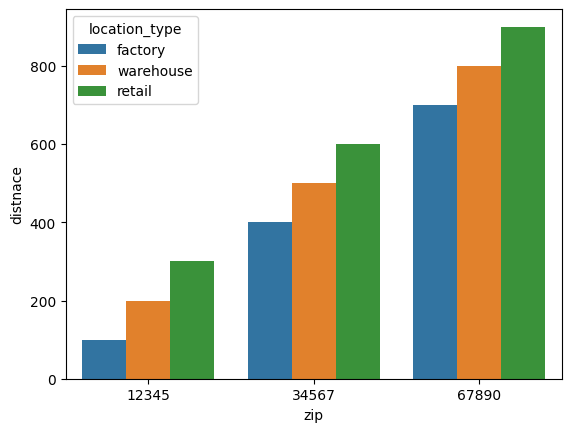

In [30]:
sns.barplot(x='zip', y='distnace', hue='location_type', data= fasla_long)